In [1]:
from datetime import datetime
import requests
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.color'] = 'b'

ModuleNotFoundError: ignored

In [ ]:
# Composite Leading Indicator

# https://data.oecd.org/leadind/composite-leading-indicator-cli.htm

def getCLI(country):
    uri = 'https://stats.oecd.org/sdmx-json/data/DP_LIVE/' + country + '.CLI.AMPLITUD.LTRENDIDX.M/OECD?json-lang=en&dimensionAtObservation=allDimensions&startPeriod=2000-01&endPeriod=2022-04'
    resp = requests.get(uri)
    result = json.loads(resp.text)
    dates = []
    cli = []
    cli_code = 'CLI.' + country
    observations = result['dataSets'][0]['observations']
    for key in observations:
        obs = observations[key][0]
        cli.append(obs)
    time_period = result['structure']['dimensions']['observation'][5]['values']

    for date in time_period:
        date = date['id']
        year = int(date[:4])
        month = int(date[5:7])
        dates.append(datetime(year=year, month=month, day=1))
    df = pd.DataFrame(data=cli, index=dates, columns=[cli_code])

    return df

In [ ]:
clikor = getCLI('KOR')

In [ ]:
cliusa = getCLI('USA')

<AxesSubplot:>

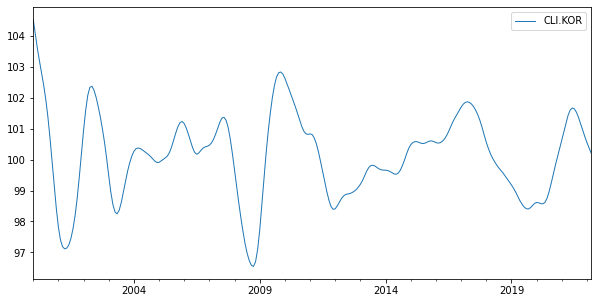

In [ ]:
clikor.plot()

In [ ]:
bond=pd.read_csv("종합채권지수.csv")

In [ ]:
단기채=bond[(bond['섹터']=='종합')&(bond['만기구분']=='3개월~1년')]
단기채=단기채.sort_values(by=['거래일'], ascending=True)

In [ ]:
중기채=bond[(bond['섹터']=='종합')&(bond['만기구분']=='1년~2년')]
중기채=중기채.sort_values(by=['거래일'], ascending=True)

In [ ]:
중기채2=bond[(bond['섹터']=='종합')&(bond['만기구분']=='2년~3년')]
중기채2=중기채2.sort_values(by=['거래일'], ascending=True)

In [ ]:
장기채=bond[(bond['섹터']=='종합')&(bond['만기구분']=='5년~10년')]
장기채=장기채.sort_values(by=['거래일'], ascending=True)

In [ ]:
단기채.to_csv('단기채지수.csv',index=False)
중기채.to_csv('중기채지수.csv',index=False)
중기채2.to_csv('중기채지수2.csv',index=False)
장기채.to_csv('장기채지수.csv',index=False)

In [ ]:
단기채.거래일=pd.to_datetime(단기채.거래일)
단기채=단기채.set_index('거래일')

In [ ]:
중기채.거래일=pd.to_datetime(중기채.거래일)
중기채=중기채.set_index('거래일')

In [ ]:
중기채2.거래일=pd.to_datetime(중기채2.거래일)
중기채2=중기채2.set_index('거래일')

In [ ]:
장기채.거래일=pd.to_datetime(장기채.거래일)
장기채=장기채.set_index('거래일')

In [ ]:
단기채M=단기채.resample('M').mean()
중기채M=중기채.resample('M').mean()
중기채2M=중기채2.resample('M').mean()
장기채M=장기채.resample('M').mean()

In [ ]:
단기채M=단기채M.reset_index()
단기채M['거래일']=단기채M['거래일'].astype('str').str[:8]+"01"

In [ ]:
중기채M=중기채M.reset_index()
중기채M['거래일']=중기채M['거래일'].astype('str').str[:8]+"01"

In [ ]:
중기채2M=중기채2M.reset_index()
중기채2M['거래일']=중기채2M['거래일'].astype('str').str[:8]+"01"

In [ ]:
장기채M=장기채M.reset_index()
장기채M['거래일']=장기채M['거래일'].astype('str').str[:8]+"01"

In [ ]:
장=장기채M[['거래일','지수(pt.)']]
단=단기채M[['거래일','지수(pt.)']]
중=중기채M[['거래일','지수(pt.)']]
중2=중기채2M[['거래일','지수(pt.)']]

In [ ]:
장.columns=['거래일','장기채지수']
단.columns=['거래일','단기채지수']
중.columns=['거래일','중기채지수']
중2.columns=['거래일','중기채지수2_3']

In [ ]:
clikor=clikor.reset_index()
clikor.columns=['거래일','CLI']
clikor

,거래일,CLI
0,2000-01-01,104.5338
1,2000-02-01,104.0497
2,2000-03-01,103.5900
3,2000-04-01,103.1838
4,2000-05-01,102.8008
...,...,...
262,2021-11-01,100.9354
263,2021-12-01,100.7345
264,2022-01-01,100.5466
265,2022-02-01,100.3716


In [ ]:
clikor.거래일=clikor.거래일.astype('str')

In [ ]:
clikor=clikor.append({'거래일':'2022-04-01','CLI':0},ignore_index=True)
clikor=clikor.append({'거래일':'2022-05-01','CLI':0},ignore_index=True)
clikor

C:\Users\ASIA\AppData\Local\Temp\ipykernel_34964\2539745201.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clikor=clikor.append({'거래일':'2022-04-01','CLI':0},ignore_index=True)
C:\Users\ASIA\AppData\Local\Temp\ipykernel_34964\2539745201.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clikor=clikor.append({'거래일':'2022-05-01','CLI':0},ignore_index=True)


,거래일,CLI
0,2000-01-01,104.5338
1,2000-02-01,104.0497
2,2000-03-01,103.5900
3,2000-04-01,103.1838
4,2000-05-01,102.8008
...,...,...
264,2022-01-01,100.5466
265,2022-02-01,100.3716
266,2022-03-01,100.2051
267,2022-04-01,0.0000


In [ ]:
clikor.CLI=clikor.CLI.shift(2)
clikor

,거래일,CLI
0,2000-01-01,NaN
1,2000-02-01,NaN
2,2000-03-01,104.5338
3,2000-04-01,104.0497
4,2000-05-01,103.5900
...,...,...
264,2022-01-01,100.9354
265,2022-02-01,100.7345
266,2022-03-01,100.5466
267,2022-04-01,100.3716


In [ ]:
clikor.거래일=clikor.거래일.astype('str')

In [ ]:
clikor=clikor.dropna()

In [ ]:
df=pd.merge(clikor,단,on='거래일',how='outer')
df=pd.merge(df,중,on='거래일',how='outer')
df=pd.merge(df,중2,on='거래일',how='outer')
df=pd.merge(df,장,on='거래일',how='outer')
df

,거래일,CLI,단기채지수,중기채지수,중기채지수2_3,장기채지수
0,2000-01-01,NaN,NaN,NaN,NaN,NaN
1,2000-02-01,NaN,NaN,NaN,NaN,NaN
2,2000-03-01,104.5338,NaN,NaN,NaN,NaN
3,2000-04-01,104.0497,NaN,NaN,NaN,NaN
4,2000-05-01,103.5900,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
264,2022-01-01,100.9354,211.822205,239.393848,261.302300,336.022703
265,2022-02-01,100.7345,212.087658,239.309138,260.573621,332.182738
266,2022-03-01,100.5466,212.384602,239.754402,260.828155,331.198593
267,2022-04-01,100.3716,212.381040,238.456424,257.602028,321.417372


In [ ]:
df.거래일=pd.to_datetime(df.거래일)
df=df.set_index('거래일')

<AxesSubplot:xlabel='거래일'>

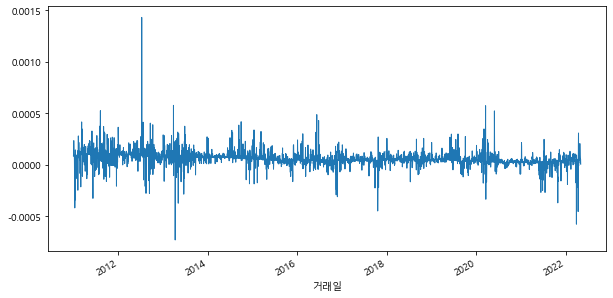

In [ ]:
단기채['지수(pt.)'].pct_change(1).plot()

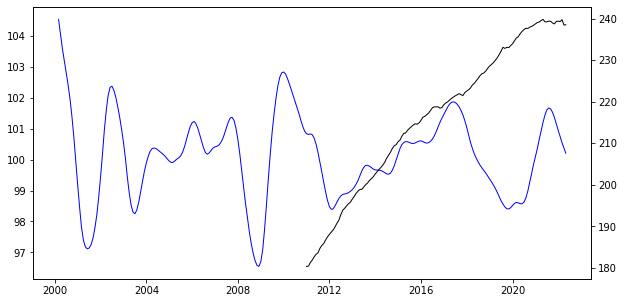

In [ ]:
fig, ax1 = plt.subplots()
ax1.plot
ax1.plot(df.index, df['CLI'], color='blue')
ax2 = ax1.twinx()
ax2.plot(df.index, df['중기채지수'], color='black')

In [ ]:
df

,CLI,단기채지수,중기채지수,중기채지수2_3,장기채지수
거래일,,,,,
2000-01-01,NaN,NaN,NaN,NaN,NaN
2000-02-01,NaN,NaN,NaN,NaN,NaN
2000-03-01,104.5338,NaN,NaN,NaN,NaN
2000-04-01,104.0497,NaN,NaN,NaN,NaN
2000-05-01,103.5900,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2022-01-01,100.9354,211.822205,239.393848,261.302300,336.022703
2022-02-01,100.7345,212.087658,239.309138,260.573621,332.182738
2022-03-01,100.5466,212.384602,239.754402,260.828155,331.198593


In [ ]:
df=clikor.copy()

In [ ]:
df['한국cli증가율'] = df['CLI'].pct_change(1)
df

,거래일,CLI,한국cli증가율
2,2000-03-01,104.5338,NaN
3,2000-04-01,104.0497,-0.004631
4,2000-05-01,103.5900,-0.004418
5,2000-06-01,103.1838,-0.003921
6,2000-07-01,102.8008,-0.003712
...,...,...,...
264,2022-01-01,100.9354,-0.002077
265,2022-02-01,100.7345,-0.001990
266,2022-03-01,100.5466,-0.001865
267,2022-04-01,100.3716,-0.001740


In [ ]:
df=df.dropna()

In [ ]:
def momentum_score(x):
    if x>0:
        return 1
    elif x<0:
        return 0

In [ ]:
df['한국cli모멘텀']=df.한국cli증가율.apply(momentum_score)

C:\Users\ASIA\AppData\Local\Temp\ipykernel_34964\1612797961.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['한국cli모멘텀']=df.한국cli증가율.apply(momentum_score)


In [ ]:
df

,거래일,CLI,한국cli증가율,한국cli모멘텀
3,2000-04-01,104.0497,-0.004631,0
4,2000-05-01,103.5900,-0.004418,0
5,2000-06-01,103.1838,-0.003921,0
6,2000-07-01,102.8008,-0.003712,0
7,2000-08-01,102.4042,-0.003858,0
...,...,...,...,...
264,2022-01-01,100.9354,-0.002077,0
265,2022-02-01,100.7345,-0.001990,0
266,2022-03-01,100.5466,-0.001865,0
267,2022-04-01,100.3716,-0.001740,0


In [ ]:
둔감 = (df['CLI']>100)&(df['한국cli모멘텀']==0)
확장 = (df['CLI']>100)&(df['한국cli모멘텀']==1)
위축 = (df['CLI']<100)&(df['한국cli모멘텀']==0)
회복 = (df['CLI']<100)&(df['한국cli모멘텀']==1)

In [ ]:
df=df.set_index('거래일')

In [ ]:
df

,거래일,CLI,한국cli증가율,한국cli모멘텀
0,2000-04-01,104.0497,-0.004631,0
1,2000-05-01,103.5900,-0.004418,0
2,2000-06-01,103.1838,-0.003921,0
3,2000-07-01,102.8008,-0.003712,0
4,2000-08-01,102.4042,-0.003858,0
...,...,...,...,...
261,2022-01-01,100.9354,-0.002077,0
262,2022-02-01,100.7345,-0.001990,0
263,2022-03-01,100.5466,-0.001865,0
264,2022-04-01,100.3716,-0.001740,0


In [ ]:
df[회복].index

Index(['2001-07-01', '2001-08-01', '2001-09-01', '2001-10-01', '2001-11-01',
       '2001-12-01', '2002-01-01', '2003-08-01', '2003-09-01', '2003-10-01',
       '2003-11-01', '2003-12-01', '2004-01-01', '2005-03-01', '2005-04-01',
       '2009-01-01', '2009-02-01', '2009-03-01', '2009-04-01', '2009-05-01',
       '2012-03-01', '2012-04-01', '2012-05-01', '2012-06-01', '2012-07-01',
       '2012-08-01', '2012-09-01', '2012-10-01', '2012-11-01', '2012-12-01',
       '2013-01-01', '2013-02-01', '2013-03-01', '2013-04-01', '2013-05-01',
       '2013-06-01', '2013-07-01', '2013-08-01', '2013-09-01', '2014-09-01',
       '2014-10-01', '2014-11-01', '2014-12-01', '2019-12-01', '2020-01-01',
       '2020-02-01', '2020-03-01', '2020-07-01', '2020-08-01', '2020-09-01',
       '2020-10-01', '2020-11-01', '2020-12-01'],
      dtype='object', name='거래일')

In [ ]:
df[둔감].index

Index(['2000-04-01', '2000-05-01', '2000-06-01', '2000-07-01', '2000-08-01',
       '2000-09-01', '2000-10-01', '2000-11-01', '2002-08-01', '2002-09-01',
       '2002-10-01', '2002-11-01', '2002-12-01', '2003-01-01', '2003-02-01',
       '2004-06-01', '2004-07-01', '2004-08-01', '2004-09-01', '2004-10-01',
       '2004-11-01', '2004-12-01', '2006-03-01', '2006-04-01', '2006-05-01',
       '2006-06-01', '2006-07-01', '2006-08-01', '2006-09-01', '2007-11-01',
       '2007-12-01', '2008-01-01', '2008-02-01', '2010-02-01', '2010-03-01',
       '2010-04-01', '2010-05-01', '2010-06-01', '2010-07-01', '2010-08-01',
       '2010-09-01', '2010-10-01', '2010-11-01', '2010-12-01', '2011-01-01',
       '2011-02-01', '2011-04-01', '2011-05-01', '2011-06-01', '2011-07-01',
       '2015-06-01', '2015-07-01', '2015-08-01', '2015-09-01', '2016-02-01',
       '2016-03-01', '2016-04-01', '2017-07-01', '2017-08-01', '2017-09-01',
       '2017-10-01', '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01',

In [ ]:
from pykrx import stock

In [ ]:
df=df.reset_index()
df.거래일=pd.to_datetime(df.거래일)
df=df.set_index('거래일')

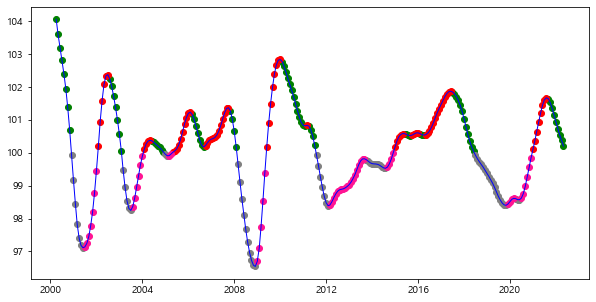

In [ ]:
fig, ax1 = plt.subplots()
ax1.plot
# line plot
ax1.plot(df.index, df['CLI'], color='blue')

ax1.scatter(df[둔감].index, df[둔감]['CLI'], color='green')
ax1.scatter(df[확장].index, df[확장]['CLI'], color='red')
ax1.scatter(df[위축].index, df[위축]['CLI'], color='gray')
ax1.scatter(df[회복].index, df[회복]['CLI'], color='deeppink')

In [ ]:
df['둔감']=0
df['위축']=0
df['확장']=0
df['회복']=0

In [ ]:
df.loc[df[위축].index,'위축']=1
df.loc[df[둔감].index,'둔감']=1
df.loc[df[확장].index,'확장']=1
df.loc[df[회복].index,'회복']=1

In [ ]:
df.to_csv('경기4국면.csv')

In [ ]:
df[둔감].index

DatetimeIndex(['2000-04-01', '2000-05-01', '2000-06-01', '2000-07-01',
               '2000-08-01', '2000-09-01', '2000-10-01', '2000-11-01',
               '2002-08-01', '2002-09-01', '2002-10-01', '2002-11-01',
               '2002-12-01', '2003-01-01', '2003-02-01', '2004-06-01',
               '2004-07-01', '2004-08-01', '2004-09-01', '2004-10-01',
               '2004-11-01', '2004-12-01', '2006-03-01', '2006-04-01',
               '2006-05-01', '2006-06-01', '2006-07-01', '2006-08-01',
               '2006-09-01', '2007-11-01', '2007-12-01', '2008-01-01',
               '2008-02-01', '2010-02-01', '2010-03-01', '2010-04-01',
               '2010-05-01', '2010-06-01', '2010-07-01', '2010-08-01',
               '2010-09-01', '2010-10-01', '2010-11-01', '2010-12-01',
               '2011-01-01', '2011-02-01', '2011-04-01', '2011-05-01',
               '2011-06-01', '2011-07-01', '2015-06-01', '2015-07-01',
               '2015-08-01', '2015-09-01', '2016-02-01', '2016-03-01',
      

In [ ]:
kospi = stock.get_index_ohlcv("20000501", "20220505", "1001","m")
kospi

코스피,시가,고가,저가,종가,거래량
날짜,,,,,
2000-05-31,731.76,778.46,625.14,731.88,4940346440
2000-06-30,730.55,858.34,722.24,821.22,8784222920
2000-07-31,824.83,863.53,678.35,705.97,8758613310
2000-08-31,710.05,754.46,665.63,688.62,6026628840
2000-09-30,690.93,698.28,551.00,613.22,5462448230
...,...,...,...,...,...
2022-01-31,2998.32,3010.77,2591.53,2663.34,10925620515
2022-02-28,2706.34,2788.27,2642.63,2699.18,10117938499
2022-03-31,2698.31,2765.20,2605.81,2757.65,14407387495


In [ ]:
kospi=kospi.reset_index()
kospi['날짜']=kospi['날짜'].astype('str')
kospi['날짜']=kospi['날짜'].str[:8]+"01"

In [ ]:
df=df.reset_index()

In [ ]:
kospi

코스피,거래일,종가
0,2000-05-01,731.88
1,2000-06-01,821.22
2,2000-07-01,705.97
3,2000-08-01,688.62
4,2000-09-01,613.22
...,...,...
260,2022-01-01,2663.34
261,2022-02-01,2699.18
262,2022-03-01,2757.65
263,2022-04-01,2695.05


In [ ]:
kospi['거래일']=pd.to_datetime(kospi['날짜'])
kospi

코스피,날짜,시가,고가,저가,종가,거래량,거래일
0,2000-05-01,731.76,778.46,625.14,731.88,4940346440,2000-05-01
1,2000-06-01,730.55,858.34,722.24,821.22,8784222920,2000-06-01
2,2000-07-01,824.83,863.53,678.35,705.97,8758613310,2000-07-01
3,2000-08-01,710.05,754.46,665.63,688.62,6026628840,2000-08-01
4,2000-09-01,690.93,698.28,551.00,613.22,5462448230,2000-09-01
...,...,...,...,...,...,...,...
260,2022-01-01,2998.32,3010.77,2591.53,2663.34,10925620515,2022-01-01
261,2022-02-01,2706.34,2788.27,2642.63,2699.18,10117938499,2022-02-01
262,2022-03-01,2698.31,2765.20,2605.81,2757.65,14407387495,2022-03-01
263,2022-04-01,2745.85,2769.18,2615.50,2695.05,22025887930,2022-04-01


In [ ]:
kospi=kospi[['거래일','종가']]
df2=pd.merge(df,kospi,on='거래일',how='outer')
df2

,거래일,CLI,단기채지수,중기채지수,중기채지수2_3,장기채지수,한국cli증가율,한국cli모멘텀,종가
0,2011-01-01,100.8343,165.614109,180.336835,189.048682,215.643819,-0.000846,0.0,2069.73
1,2011-02-01,100.8154,165.836221,180.420174,188.969452,215.537649,-0.000187,0.0,1939.30
2,2011-03-01,100.8304,166.325129,181.247122,190.377973,219.558410,0.000149,1.0,2106.70
3,2011-04-01,100.8076,166.852599,181.852332,191.143420,220.978450,-0.000226,0.0,2192.36
4,2011-05-01,100.6981,167.386257,182.602742,192.219742,223.784296,-0.001086,0.0,2142.47
...,...,...,...,...,...,...,...,...,...
260,2010-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1742.75
261,2010-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1872.81
262,2010-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1882.95
263,2010-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1904.63


In [ ]:
df=df2.dropna()
df

,거래일,CLI,단기채지수,중기채지수,중기채지수2_3,장기채지수,한국cli증가율,한국cli모멘텀,종가
0,2011-01-01,100.8343,165.614109,180.336835,189.048682,215.643819,-0.000846,0.0,2069.73
1,2011-02-01,100.8154,165.836221,180.420174,188.969452,215.537649,-0.000187,0.0,1939.30
2,2011-03-01,100.8304,166.325129,181.247122,190.377973,219.558410,0.000149,1.0,2106.70
3,2011-04-01,100.8076,166.852599,181.852332,191.143420,220.978450,-0.000226,0.0,2192.36
4,2011-05-01,100.6981,167.386257,182.602742,192.219742,223.784296,-0.001086,0.0,2142.47
...,...,...,...,...,...,...,...,...,...
132,2022-01-01,100.9354,211.822205,239.393848,261.302300,336.022703,-0.002077,0.0,2663.34
133,2022-02-01,100.7345,212.087658,239.309138,260.573621,332.182738,-0.001990,0.0,2699.18
134,2022-03-01,100.5466,212.384602,239.754402,260.828155,331.198593,-0.001865,0.0,2757.65
135,2022-04-01,100.3716,212.381040,238.456424,257.602028,321.417372,-0.001740,0.0,2695.05


In [ ]:
df=df.set_index('거래일')

In [ ]:
df

,CLI,단기채지수,중기채지수,중기채지수2_3,장기채지수,한국cli증가율,한국cli모멘텀,종가
거래일,,,,,,,,
2011-01-01,100.8343,165.614109,180.336835,189.048682,215.643819,-0.000846,0.0,2069.73
2011-02-01,100.8154,165.836221,180.420174,188.969452,215.537649,-0.000187,0.0,1939.30
2011-03-01,100.8304,166.325129,181.247122,190.377973,219.558410,0.000149,1.0,2106.70
2011-04-01,100.8076,166.852599,181.852332,191.143420,220.978450,-0.000226,0.0,2192.36
2011-05-01,100.6981,167.386257,182.602742,192.219742,223.784296,-0.001086,0.0,2142.47
...,...,...,...,...,...,...,...,...
2022-01-01,100.9354,211.822205,239.393848,261.302300,336.022703,-0.002077,0.0,2663.34
2022-02-01,100.7345,212.087658,239.309138,260.573621,332.182738,-0.001990,0.0,2699.18
2022-03-01,100.5466,212.384602,239.754402,260.828155,331.198593,-0.001865,0.0,2757.65


In [ ]:
df[회복]

,CLI,단기채지수,중기채지수,중기채지수2_3,장기채지수,한국cli증가율,한국cli모멘텀,종가
거래일,,,,,,,,
2012-03-01,98.41084,172.740330,189.104923,199.954248,236.827006,0.000212,1.0,2014.04
2012-04-01,98.50913,173.327614,189.904939,201.045041,238.593071,0.000999,1.0,1981.99
2012-05-01,98.63074,173.907213,190.759559,202.327493,241.488273,0.001235,1.0,1843.47
2012-06-01,98.74551,174.482849,191.524509,203.296470,243.749061,0.001164,1.0,1854.01
2012-07-01,98.82772,175.286302,192.833766,205.204874,249.034073,0.000833,1.0,1881.99
2012-08-01,98.87389,175.926448,193.887958,206.908291,253.379377,0.000467,1.0,1905.12
2012-09-01,98.88952,176.356440,194.357322,207.470787,254.839563,0.000158,1.0,1996.21
2012-10-01,98.90339,176.835872,194.928067,208.144353,256.547090,0.000140,1.0,1912.06
2012-11-01,98.93301,177.300779,195.456031,208.738375,257.105455,0.000299,1.0,1932.90


# 대체투자자산

In [ ]:
import pandas as pd
import FinanceDataReader as fdr
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()

In [ ]:
INDEX_NAME = ["SPY", "^GSPC", "SHY","^KS11", "TLT", "GLD", "DJI",'USDKRW=X']   #미'USDKRW=X' 일'JPYKRW=X' 영'GBPKRW=X'
SDATE = "1980-01-01"
EDATE = "2022-05-05"
dict={}

for index in INDEX_NAME:
    df3 = pdr.get_data_yahoo(index,start=SDATE)
    dict[index] = df3['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
df3 = pd.DataFrame(dict)
df3.columns = ["NASDAQ", "S&P500", "BOND-S","KOSPI", "BOND-G", "GLD", "DJI",'USDKRW']

In [ ]:
df3=df3.dropna(axis=0)
df3

,NASDAQ,S&P500,BOND-S,KOSPI,BOND-G,GLD,DJI,USDKRW
Date,,,,,,,,
2004-11-18,84.490051,1183.550049,61.795052,875.840027,51.312916,44.380001,10572.500000,1062.000000
2004-11-19,83.550819,1170.339966,61.696770,867.030029,50.903412,44.779999,10456.900391,1054.000000
2004-11-22,83.949280,1177.239990,61.711800,849.989990,51.168716,44.950001,10489.400391,1026.699951
2004-11-23,84.077354,1176.939941,61.704315,860.400024,51.232208,44.750000,10492.599609,1055.000000
2004-11-24,84.276566,1181.760010,61.696770,872.559998,51.232208,45.049999,10520.299805,1066.500000
...,...,...,...,...,...,...,...,...
2022-02-23,420.643219,4225.500000,84.233917,2719.530029,136.058853,178.289993,33131.800781,1192.680054
2022-02-24,426.973541,4288.700195,84.303833,2648.800049,136.148453,177.139999,33223.800781,1192.400024
2022-02-25,436.394287,4384.649902,84.303833,2676.760010,136.247986,176.550003,34058.800781,1206.000000


In [ ]:
df3m=df3.resample('m').mean()

In [ ]:
df3m=df3m.reset_index()
df3m['거래일']=df3m['Date'].astype('str').str[:8]+"01"
df3m

,Date,NASDAQ,S&P500,BOND-S,KOSPI,BOND-G,GLD,DJI,USDKRW,거래일
0,2004-11-30,84.033765,1178.108734,61.692965,865.925011,50.905591,44.965000,10494.725098,1050.849991,2004-11-01
1,2004-12-31,85.568381,1198.604283,61.791143,872.734762,51.179142,44.283333,10668.157087,1048.838094,2004-12-01
2,2005-01-31,84.411952,1181.407996,61.754726,902.362503,52.281285,42.445000,10539.514990,1032.342514,2005-01-01
3,2005-02-28,85.888246,1200.100624,61.737365,962.963741,53.467603,42.577500,10725.881165,1019.064384,2005-02-01
4,2005-03-31,85.599792,1194.159046,61.583890,989.319522,52.045840,43.378096,10675.052409,1007.607146,2005-03-01
...,...,...,...,...,...,...,...,...,...,...
204,2021-11-30,462.971645,4670.072485,85.608426,2962.771484,146.478543,170.206998,35845.294727,1185.116992,2021-11-01
205,2021-12-31,463.256392,4666.601698,85.445220,2984.165541,149.030006,167.298889,35574.794271,1183.542779,2021-12-01
206,2022-01-31,453.554315,4564.677734,85.045389,2857.342760,141.702080,169.766667,35411.450087,1194.671122,2022-01-01
207,2022-02-28,439.694629,4420.453498,84.376093,2722.851189,137.101728,174.040001,34546.277114,1197.421171,2022-02-01


In [ ]:
df3m['거래일']=pd.to_datetime(df3m['거래일'])

In [ ]:
df.reset_index()
df=pd.merge(df,df3m,on='거래일',how='outer')
df

,거래일,CLI,단기채지수,중기채지수,중기채지수2_3,장기채지수,한국cli증가율,한국cli모멘텀,종가,Date,NASDAQ,S&P500,BOND-S,KOSPI,BOND-G,GLD,DJI,USDKRW
0,2011-01-01,100.8343,165.614109,180.336835,189.048682,215.643819,-0.000846,0.0,2069.73,2011-01-31,103.415435,1282.618500,76.599674,2091.197986,69.272884,132.742000,11802.370117,1117.545013
1,2011-02-01,100.8154,165.836221,180.420174,188.969452,215.537649,-0.000187,0.0,1939.30,2011-02-28,106.891390,1323.702492,76.427989,2002.717499,68.124383,134.415626,12213.356201,1118.075012
2,2011-03-01,100.8304,166.325129,181.247122,190.377973,219.558410,0.000149,1.0,2106.70,2011-03-31,105.524310,1304.402721,76.629317,2002.669084,69.743122,138.674546,12082.540882,1120.522738
3,2011-04-01,100.8076,166.852599,181.852332,191.143420,220.978450,-0.000226,0.0,2192.36,2011-04-30,107.900158,1332.127377,76.683152,2151.445248,70.135075,144.702104,12439.778937,1083.747372
4,2011-05-01,100.6981,167.386257,182.602742,192.219742,223.784296,-0.001086,0.0,2142.47,2011-05-31,108.507454,1337.487356,77.045250,2123.349963,72.944797,147.414211,12570.289474,1083.699983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,2010-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-08-31,86.995438,1087.282271,76.527678,1762.183644,76.668946,119.071364,10350.400479,1178.718173
207,2010-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-09-30,89.794920,1120.268331,76.593867,1817.045539,77.198786,124.182223,10577.577691,1164.588888
208,2010-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-10-31,94.012923,1171.583810,76.809542,1889.697138,76.290594,131.379525,11044.499907,1121.176182
209,2010-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-11-30,96.352899,1198.888561,76.726108,1924.565709,72.758595,133.929524,11198.309431,1126.333328


In [ ]:
df=df.dropna()
df=df.set_index('거래일')

In [ ]:
import seaborn as sns

C:\Users\ASIA\AppData\Local\Temp\ipykernel_34964\988155852.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.heatmap(df[회복].corr(), annot=True, fmt='.2f', cmap='Blues')


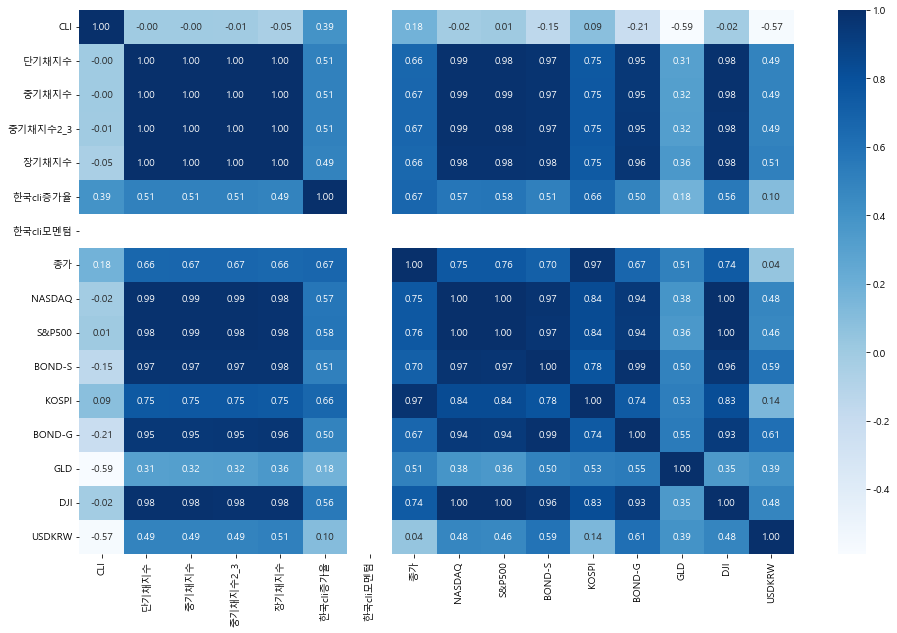

In [ ]:
plt.figure(figsize=(16,10))
sns.heatmap(df[회복].corr(), annot=True, fmt='.2f', cmap='Blues')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
df.columns

Index(['CLI', '단기채지수', '중기채지수', '중기채지수2_3', '장기채지수', '한국cli증가율', '한국cli모멘텀',
       '종가', 'Date', 'NASDAQ', 'S&P500', 'BOND-S', 'KOSPI', 'BOND-G', 'GLD',
       'DJI', 'USDKRW'],
      dtype='object')

In [ ]:
ncol_list=['CLI', '단기채지수', '중기채지수', '중기채지수2_3', '장기채지수', '한국cli증가율', '한국cli모멘텀',
       '종가', 'NASDAQ', 'S&P500', 'BOND-S', 'KOSPI', 'BOND-G', 'GLD',
       'DJI', 'USDKRW']

In [ ]:
df[ncol_list] = scaler.fit_transform(df[ncol_list])

In [ ]:
df[회복].index

C:\Users\ASIA\AppData\Local\Temp\ipykernel_34964\2221532404.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[회복].index


DatetimeIndex(['2012-03-01', '2012-04-01', '2012-05-01', '2012-06-01',
               '2012-07-01', '2012-08-01', '2012-09-01', '2012-10-01',
               '2012-11-01', '2012-12-01', '2013-01-01', '2013-02-01',
               '2013-03-01', '2013-04-01', '2013-05-01', '2013-06-01',
               '2013-07-01', '2013-08-01', '2013-09-01', '2014-09-01',
               '2014-10-01', '2014-11-01', '2014-12-01', '2020-01-01',
               '2020-02-01', '2020-03-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01'],
              dtype='datetime64[ns]', name='거래일', freq=None)

In [ ]:
zzz=pd.read_csv('종합채권지수.csv')

In [ ]:
zzz['섹터'].unique()

array(['종합', '국공채지수', '국채지수', '국고채지수', '특수채지수', '금융채지수', '통안채지수', '회사채지수',
       'ABS지수'], dtype=object)

In [ ]:
zzz=zzz.set_index('거래일')

In [ ]:
zzz

,지수명,섹터,만기구분,지수(pt.),일별수익률(%),종목수,단가(원),이표율(%),만기일,Duration,Convexity,YTM(%)
거래일,,,,,,,,,,,,
2011-04-01,매경BP종합채권지수,종합,전체,183.924922,0.126205,6913.0,10343.1042,4.7901,2014-07-30,2.805912,17.639013,3.998983
2011-04-01,매경BP종합채권지수,종합,3개월~1년,166.647302,0.019809,1826.0,10227.6958,4.7389,2011-11-19,0.622730,0.674375,3.584937
2011-04-01,매경BP종합채권지수,종합,1년~2년,181.707922,0.056864,1739.0,10263.1074,4.5514,2012-09-17,1.403370,2.586849,3.842634
2011-04-01,매경BP종합채권지수,종합,2년~3년,191.080780,0.153917,1444.0,10310.5735,4.8449,2013-10-18,2.377136,6.892892,4.114714
2011-04-01,매경BP종합채권지수,종합,3년~5년,196.017992,0.271634,1383.0,10258.0829,4.6509,2015-03-28,3.612525,15.641840,4.181504
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-01,매경BP종합채권지수,ABS지수,1년~2년,257.996126,0.006375,324.0,9900.7896,1.4881,2023-08-07,1.423687,2.426963,2.281821
2022-03-01,매경BP종합채권지수,ABS지수,2년~3년,285.290800,0.007368,115.0,9838.3109,1.8453,2024-07-25,2.341120,6.173554,2.645449
2022-03-01,매경BP종합채권지수,ABS지수,3년~5년,352.050196,0.007950,8.0,9759.9402,2.0949,2025-11-28,3.583955,14.398418,2.861806


<AxesSubplot:xlabel='거래일'>

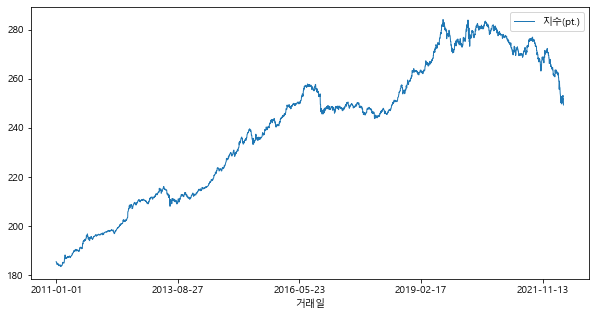

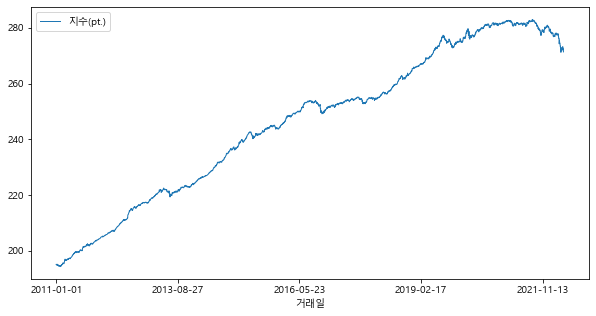

In [ ]:
zzz[(zzz['섹터']=='국채지수')&(zzz['만기구분']=='전체')]['지수(pt.)'].reset_index().sort_values(by=['거래일'], ascending=True).set_index('거래일').plot()
zzz[(zzz['섹터']=='회사채지수')&(zzz['만기구분']=='전체')]['지수(pt.)'].reset_index().sort_values(by=['거래일'], ascending=True).set_index('거래일').plot()

In [ ]:
df[위축].index

C:\Users\ASIA\AppData\Local\Temp\ipykernel_34964\4221047253.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[위축].index


DatetimeIndex(['2011-08-01', '2011-09-01', '2011-10-01', '2011-11-01',
               '2011-12-01', '2012-01-01', '2012-02-01', '2013-10-01',
               '2013-11-01', '2013-12-01', '2014-01-01', '2014-02-01',
               '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01',
               '2014-07-01', '2014-08-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2020-04-01', '2020-05-01',
               '2020-06-01'],
              dtype='datetime64[ns]', name='거래일', freq=None)

In [ ]:
stock.get_index_ohlcv("20180501", "20190401", "1001")

코스피,시가,고가,저가,종가,거래량,거래대금
날짜,,,,,,
2018-05-02,2515.75,2516.57,2501.71,2505.61,807588696,11712287148051
2018-05-03,2506.94,2507.91,2487.25,2487.25,614102408,7866074431575
2018-05-04,2486.47,2487.77,2461.38,2461.38,612024164,10816535475626
2018-05-08,2468.45,2479.75,2444.08,2449.81,714734325,9630702860810
2018-05-09,2450.71,2451.86,2428.79,2443.98,593365934,9069419048307
...,...,...,...,...,...,...
2019-03-26,2152.98,2153.90,2143.63,2148.80,301253574,4248900137963
2019-03-27,2147.19,2152.91,2132.42,2145.62,363169415,4490155588700
2019-03-28,2131.25,2136.40,2120.93,2128.10,288036217,4403905967205


In [ ]:
(2168.28-2505.61)/2505.61

-0.13462989052566038

In [ ]:
from pykrx import bond

In [ ]:
bond.get_otc_treasury_yields("20110101", "20220504", "국고채30년")

,수익률,대비
일자,,
2011-01-03,0.000,0.000
2011-01-04,0.000,0.000
2011-01-05,0.000,0.000
2011-01-06,0.000,0.000
2011-01-07,0.000,0.000
...,...,...
2022-04-28,3.090,-0.026
2022-04-29,3.163,0.073
2022-05-02,3.280,0.117


# 채권지수 머신러닝

In [ ]:
import pandas as pd

In [ ]:
real2=pd.DataFrame()

In [ ]:
for i in range(104):
    try:
        room=pd.read_excel("./채권리얼/index_pe01_02_bondDaily_stream_dynamic ("+str(i)+").xlsx")
        real2=pd.concat([real2,room],axis=0)
    except:
        pass

In [ ]:
real2=real2.sort_values(by=['거래일'], ascending=True)

In [ ]:
real2.to_csv('회사채모든정보.csv',index=False)

In [ ]:
real3=real2.drop_duplicates(subset=None, keep='first', ignore_index=False)

In [ ]:
real3.to_csv('회사채중복제거.csv',index=False)

In [ ]:
real3[real3['섹터']=='회사채AAA']

,거래일,지수명,섹터 그룹,섹터,만기구분,시가총액(억원),총수익률(%),자본수익률(%),이자수익률(%),종목수,단가(원),이표율(%),만기일,Duration,Convexity,YTM(%)
4357,2002-01-02,매경BP종합,무보증회사채,회사채AAA,4년~5년,6385.17490,-0.588993,-0.625477,0.036454,4.0,9827.278635,6.555536,2006-08-24,3.928376,18.005186,7.187232
4356,2002-01-02,매경BP종합,무보증회사채,회사채AAA,3년~4년,2087.39800,-0.490300,-0.531800,0.041454,1.0,10436.990000,8.000000,2005-11-20,3.299100,12.769600,6.980000
4355,2002-01-02,매경BP종합,무보증회사채,회사채AAA,2년6개월~3년,15516.18623,-0.341021,-0.369729,0.028695,8.0,9698.016779,5.107920,2004-10-02,2.517978,7.275406,6.607338
4354,2002-01-02,매경BP종합,무보증회사채,회사채AAA,2년~2년6개월,3054.28800,-0.228000,-0.262600,0.034619,1.0,10180.960000,6.500000,2004-01-15,1.867700,4.121500,6.280000
4353,2002-01-02,매경BP종합,무보증회사채,회사채AAA,1년6개월~2년,3138.34400,-0.176877,-0.218377,0.041488,2.0,10461.167879,8.000000,2003-08-16,1.493806,2.728121,6.073226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,2022-05-10,매경BP종합,무보증회사채,회사채AAA,5년~7년,47093.62355,0.072330,0.064601,0.007729,56.0,9435.762006,2.650136,2028-03-03,5.362265,31.889224,3.777101
12,2022-05-10,매경BP종합,무보증회사채,회사채AAA,20년 초과,33485.12820,0.122726,0.114619,0.008106,61.0,7266.803013,2.172748,2049-11-27,19.203120,467.548956,3.792829
11,2022-05-10,매경BP종합,무보증회사채,회사채AAA,10년~20년,74660.94555,0.104343,0.096196,0.008147,109.0,8555.713353,2.585461,2037-10-02,12.376260,184.503907,3.806475
10,2022-05-10,매경BP종합,무보증회사채,회사채AAA,7년~10년,49733.11523,0.085112,0.077728,0.007384,72.0,9146.052580,2.536842,2030-10-20,7.483639,62.563666,3.799481


In [ ]:
real3['섹터'].value_counts()

회사채AAA     60059
회사채AA      52509
회사채AA-     52144
회사채AA+     49321
회사채A+      47944
회사채A       46587
회사채A-      44418
회사채BBB+    40273
회사채BBB     35595
회사채BBB-    21213
회사채BB      14031
회사채B        4889
회사채CCC      3552
회사채C         660
회사채CC        199
회사채기타         77
Name: 섹터, dtype: int64

In [ ]:
real2.만기구분.value_counts()

2년6개월~3년    5077
1년~1년6개월    5077
1년6개월~2년    5076
2년~2년6개월    5075
3개월~6개월     5055
6개월~9개월     5052
9개월~1년      5051
4년~5년       5028
3년~4년       5014
5년~7년       4068
7년~10년      2564
전체             7
Name: 만기구분, dtype: int64

In [ ]:
real2.만기구분.unique()

array(['3개월~6개월', '4년~5년', '3년~4년', '2년6개월~3년', '2년~2년6개월', '1년6개월~2년',
       '1년~1년6개월', '6개월~9개월', '5년~7년', '전체', '9개월~1년', '7년~10년',
       '10년~20년', '20년 초과'], dtype=object)

In [ ]:
short=real2[real2.만기구분=='3개월~6개월']

In [ ]:
mid=real2[real2.만기구분=='1년6개월~2년']

In [ ]:
short.to_csv('단기채지수(최종).csv',index=False)
mid.to_csv('중기채지수(최종).csv',index=False)

In [ ]:
long=real2[real2.만기구분=='4년~5년']

In [ ]:
short=short.drop_duplicates(['거래일'], keep = 'first')

In [ ]:
mid=mid.drop_duplicates(['거래일'], keep = 'first')

In [ ]:
mid.거래일=pd.to_datetime(mid.거래일)

In [ ]:
short.거래일=pd.to_datetime(short.거래일)

C:\Users\ASIA\AppData\Local\Temp\ipykernel_34964\859857756.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short.거래일=pd.to_datetime(short.거래일)


In [ ]:
long.거래일=pd.to_datetime(long.거래일)

C:\Users\ASIA\AppData\Local\Temp\ipykernel_34964\2211353631.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long.거래일=pd.to_datetime(long.거래일)


In [ ]:
short=short.set_index('거래일')

In [ ]:
mid=mid.set_index('거래일')

In [ ]:
long=long.set_index('거래일')

<AxesSubplot:xlabel='거래일'>

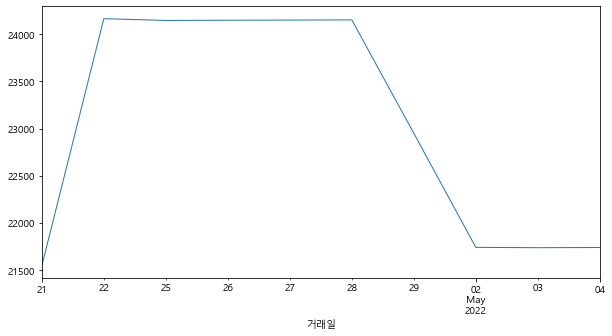

In [ ]:
short['시가총액(억원)'].iloc[-10:].plot()

In [ ]:
지수=pd.read_csv('신용등급채권지수.csv')

In [ ]:
AAA지수=지수[(지수['섹터']=='AAA(회사)')&(지수['만기구분']=='전체')]

In [ ]:
지수.만기구분.unique()

array(['전체', '3개월~1년', '1년~2년', '2년~3년', '3년~5년', '5년~10년', '10년 초과 전체'],
      dtype=object)

In [ ]:
real2.만기구분.value_counts()

4년~5년       5116
3년~4년       5116
2년6개월~3년    5116
1년~1년6개월    5116
1년6개월~2년    5091
2년~2년6개월    5082
9개월~1년      5008
3개월~6개월     4963
6개월~9개월     4956
5년~7년       4746
7년~10년      4738
10년~20년     3136
20년 초과      2339
전체             1
Name: 만기구분, dtype: int64

<AxesSubplot:xlabel='거래일'>

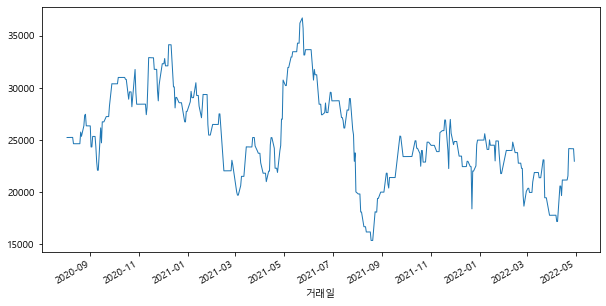

In [ ]:
short['시가총액(억원)'].loc['2020-08-01':'2022-05-01'].plot()

In [ ]:
short['시가총액(억원)']

거래일
2002-01-02     3047.2500
2002-01-03     3047.7180
2002-01-04     3048.7125
2002-01-05     3049.1760
2002-01-07     3050.4435
                 ...    
2022-04-28    24151.0298
2022-04-29    22949.8572
2022-05-02    21741.3548
2022-05-03    21737.9601
2022-05-04    21739.7831
Name: 시가총액(억원), Length: 4922, dtype: float64

In [ ]:
kospi = stock.get_index_ohlcv("20020102", "20220506", "1001")
kospi

코스피,시가,고가,저가,종가,거래량,거래대금
날짜,,,,,,
2002-01-02,698.00,725.06,690.36,724.95,618721675,5213506880730
2002-01-03,726.76,735.77,722.35,727.66,752580733,4030238096555
2002-01-04,744.46,750.83,739.14,747.72,630662171,3927673970160
2002-01-07,748.54,757.81,735.55,751.48,753589787,4525813839930
2002-01-08,747.21,750.89,734.76,734.76,799323132,4282483357475
...,...,...,...,...,...,...
2022-04-29,2669.18,2696.10,2664.06,2695.05,975253172,12664752150376
2022-05-02,2669.21,2689.91,2667.85,2687.45,873722720,9075648672047
2022-05-03,2690.16,2702.10,2680.46,2680.46,883402977,9199338259039


In [ ]:
kospi=kospi.reset_index()

In [ ]:
short=short.reset_index()
mid=mid.reset_index()
long=long.reset_index()

In [ ]:
kospi['거래일']=kospi['날짜']
kospi

코스피,날짜,시가,고가,저가,종가,거래량,거래대금,거래일
0,2002-01-02,698.00,725.06,690.36,724.95,618721675,5213506880730,2002-01-02
1,2002-01-03,726.76,735.77,722.35,727.66,752580733,4030238096555,2002-01-03
2,2002-01-04,744.46,750.83,739.14,747.72,630662171,3927673970160,2002-01-04
3,2002-01-07,748.54,757.81,735.55,751.48,753589787,4525813839930,2002-01-07
4,2002-01-08,747.21,750.89,734.76,734.76,799323132,4282483357475,2002-01-08
...,...,...,...,...,...,...,...,...
5024,2022-04-29,2669.18,2696.10,2664.06,2695.05,975253172,12664752150376,2022-04-29
5025,2022-05-02,2669.21,2689.91,2667.85,2687.45,873722720,9075648672047,2022-05-02
5026,2022-05-03,2690.16,2702.10,2680.46,2680.46,883402977,9199338259039,2022-05-03
5027,2022-05-04,2690.45,2696.03,2667.23,2677.57,1181019910,9903933505101,2022-05-04


In [ ]:
kospi=pd.read_csv('kospi.csv')

In [ ]:
kospi[['거래일','종가']]

코스피,거래일,종가
0,2002-01-02,724.95
1,2002-01-03,727.66
2,2002-01-04,747.72
3,2002-01-07,751.48
4,2002-01-08,734.76
...,...,...
5024,2022-04-29,2695.05
5025,2022-05-02,2687.45
5026,2022-05-03,2680.46
5027,2022-05-04,2677.57


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()

In [ ]:
ncol_list=['kospi', '단기채', '중기채', '장기채', '단기채지수']

In [ ]:
sdf=pd.DataFrame()

In [ ]:
sdf[ncol_list] = df[ncol_list].pct_change(1)

In [ ]:
sdf.describe()

,kospi,단기채,중기채,장기채,단기채지수
count,5116.000000,5116.000000,5116.000000,5116.000000,5116.000000
mean,0.000338,0.004923,0.003766,0.001044,0.004923
std,0.013040,0.114569,0.122023,0.038708,0.114569
min,-0.105705,-0.859742,-0.933705,-0.868259,-0.859742
25%,-0.005310,-0.000094,-0.000573,-0.001081,-0.000094
50%,0.000538,0.000074,0.000061,0.000132,0.000074
75%,0.006806,0.000205,0.000583,0.001322,0.000205
max,0.119457,4.016432,5.466613,0.714414,4.016432


In [ ]:
df['단기채지수']=(df['단기채']/3047.2500)*100

<AxesSubplot:xlabel='거래일'>

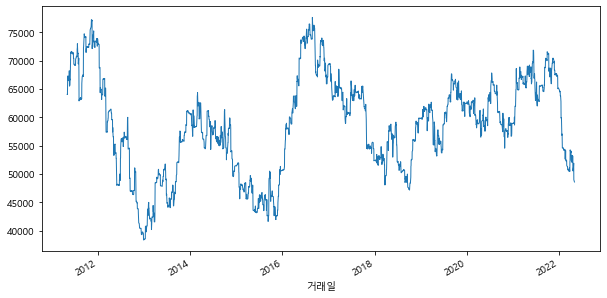

In [ ]:
df.set_index('거래일').dropna().장기채.loc['2011-05-01':].plot()

<AxesSubplot:>

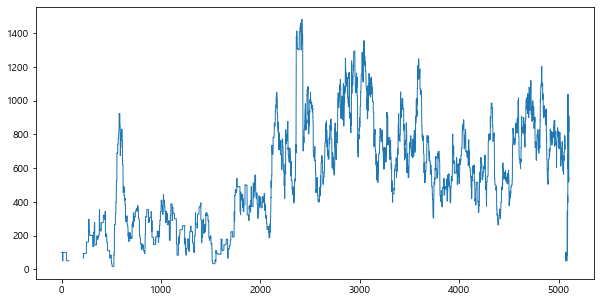

In [ ]:
df['단기채지수'].plot()

In [ ]:
df['kospi_pct']=df['kospi'].pct_change(1)

In [ ]:
df[['단기채','중기채','장기채']]=df[['단기채','중기채','장기채']]*0.01

In [ ]:
df=df.dropna()

In [ ]:
df.dropna().describe()

,kospi,단기채,중기채,장기채,kospi_pct
count,4927.000000,4927.000000,4927.000000,4927.000000,4927.000000
mean,1798.446720,0.000126,0.000155,0.000180,0.000418
std,594.563982,0.000139,0.000647,0.001805,0.012780
min,515.240000,-0.002233,-0.008792,-0.021734,-0.105705
25%,1396.490000,0.000049,-0.000076,-0.000613,-0.005215
50%,1928.760000,0.000096,0.000139,0.000187,0.000638
75%,2082.560000,0.000166,0.000407,0.001010,0.006825
max,3305.210000,0.002676,0.010017,0.018343,0.119457


In [ ]:
df=pd.merge(kospi[['거래일','종가']],short[['거래일','총수익률(%)']],on='거래일',how='outer')
df=pd.merge(df,mid[['거래일','총수익률(%)']],on='거래일',how='outer')
df=pd.merge(df,long[['거래일','총수익률(%)']],on='거래일',how='outer')
df.columns=['거래일','kospi','단기채','중기채','장기채']
df

,거래일,kospi,단기채,중기채,장기채
0,2002-01-02,724.95,-0.011153,-0.176877,-0.588993
1,2002-01-03,727.66,0.015304,0.016500,0.019469
2,2002-01-04,747.72,0.032560,0.090857,0.231000
3,2002-01-07,751.48,0.041530,0.091925,0.235922
4,2002-01-08,734.76,0.008485,-0.017000,-0.059326
...,...,...,...,...,...
5112,2002-06-01,NaN,NaN,0.016400,0.022409
5113,2002-06-08,NaN,NaN,0.016300,0.025299
5114,2002-06-15,NaN,NaN,0.016200,0.018483
5115,2002-06-22,NaN,NaN,0.016000,0.023082


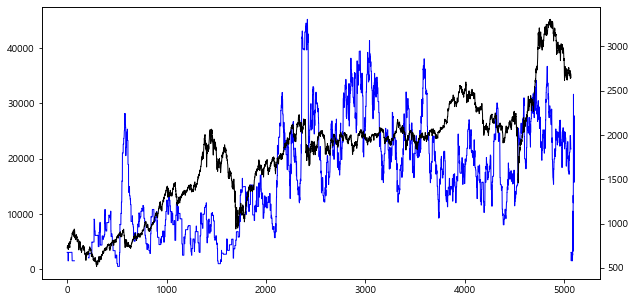

In [ ]:
fig, ax1 = plt.subplots()
ax1.plot
ax1.plot(df.index, df['단기채'], color='blue')
ax2 = ax1.twinx()
ax2.plot(df.index, df['kospi'], color='black')

In [ ]:
10000*0.00037865*365

1382.0725

In [ ]:
short

,거래일,지수명,섹터 그룹,섹터,만기구분,시가총액(억원),총수익률(%),자본수익률(%),이자수익률(%),종목수,단가(원),이표율(%),만기일,Duration,Convexity,YTM(%)
0,2002-01-02,매경BP종합,무보증회사채,회사채AAA,3개월~6개월,3047.2500,-0.011153,-0.049050,0.037865,2.0,10157.740447,7.000000,2002-05-16,0.362485,0.229146,5.109368
1,2002-01-03,매경BP종합,무보증회사채,회사채AAA,3개월~6개월,3047.7180,0.015304,-0.003494,0.018935,2.0,10159.301384,7.000000,2002-05-16,0.359734,0.226548,5.104342
2,2002-01-04,매경BP종합,무보증회사채,회사채AAA,3개월~6개월,3048.7125,0.032560,0.013661,0.018932,2.0,10162.608332,7.000000,2002-05-16,0.357142,0.223957,5.054401
3,2002-01-05,매경BP종합,무보증회사채,회사채AAA,3개월~6개월,3049.1760,0.015154,-0.003644,0.018926,2.0,10164.154207,7.000000,2002-05-16,0.354391,0.221359,5.049376
4,2002-01-07,매경BP종합,무보증회사채,회사채AAA,3개월~6개월,3050.4435,0.041530,0.003682,0.037846,2.0,10168.375144,7.000000,2002-05-16,0.348995,0.216267,5.009382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4917,2022-04-28,매경BP종합,무보증회사채,회사채AAA,3개월~6개월,24151.0298,0.007639,0.002083,0.005555,19.0,10021.351584,2.023010,2022-09-18,0.389295,0.255064,2.026399
4918,2022-04-29,매경BP종합,무보증회사채,회사채AAA,3개월~6개월,22949.8572,0.005735,0.000097,0.005638,18.0,10021.958955,2.055448,2022-09-21,0.393819,0.259020,2.029053
4919,2022-05-02,매경BP종합,무보증회사채,회사채AAA,3개월~6개월,21741.3548,0.014311,-0.002135,0.016446,17.0,10015.418950,1.996527,2022-09-18,0.400477,0.264663,2.037439
4920,2022-05-03,매경BP종합,무보증회사채,회사채AAA,3개월~6개월,21737.9601,0.003249,-0.002216,0.005465,17.0,10017.634234,1.996905,2022-09-26,0.397822,0.261824,2.043734


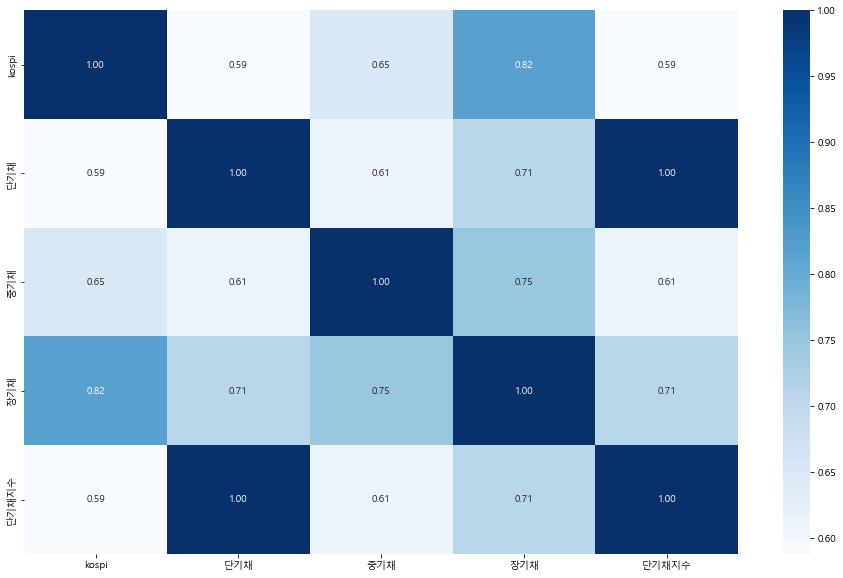

In [ ]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Blues')
plt.show()

In [ ]:
short.to_csv('회사AAA단기채.csv')

In [ ]:
mid.to_csv('회사AAA중기채.csv')

In [ ]:
long.to_csv('회사AAA장기채.csv')

In [ ]:
import pandas as pd
import numpy as np
import pickle

In [ ]:
with open("data.pickle","rb") as fr:
    data = pickle.load(fr)
    data

In [ ]:
df=df.set_index('거래일')

In [ ]:
df.columns

Index(['kospi', '단기채', '중기채', '장기채', 'kospi_pct'], dtype='object')

In [ ]:
df=df[['단기채', '중기채', '장기채', 'kospi_pct']]
df

,단기채,중기채,장기채,kospi_pct
거래일,,,,
2002-01-03,0.000153,0.000165,0.000195,0.003738
2002-01-04,0.000326,0.000909,0.002310,0.027568
2002-01-07,0.000415,0.000919,0.002359,0.005029
2002-01-08,0.000085,-0.000170,-0.000593,-0.022249
2002-01-09,0.000124,0.000499,0.000542,0.022933
...,...,...,...,...
2022-04-28,0.000076,-0.000707,-0.000710,0.010773
2022-04-29,0.000057,-0.000591,-0.001723,0.010332
2022-05-02,0.000143,-0.001413,-0.005704,-0.002820


In [ ]:
rtn_df=df.copy()

In [ ]:

N_STOCKS = 4  # 포트폴리오를 구성할 주식 종목 개수
N_TIME = 60    # look back window size
N_FUTURE = 20  # 미래 20 기간의 최적 포트폴리오를 추정할 예정이다.

# 1. 학습과 performance-test에 사용할 데이터를 생성한다.
# --------------------------------------------------
# 수익률 sequence 데이터를 생성한다.
def make_sequence(x):
    T = N_TIME + N_FUTURE
    x_seq = np.expand_dims(np.array(x.iloc[0:T, :]), 0)
    
    for i in range(1, len(x) - T + 1):
        d = np.expand_dims(np.array(x.iloc[i:(i+T), :]), 0)
        x_seq = np.concatenate((x_seq, d))
        
    return x_seq

# 학습 데이터와 시험 데이터를 생성한다. 시험 데이터는 향후 performance test용으로
# 사용한다. 학습 데이터 80%, 시험 데이터 20%
n = int(rtn_df.shape[0] * 0.8)
rtn_train = make_sequence(rtn_df[:n])
rtn_test = make_sequence(rtn_df[n:])   # 이 데이터는 학습에 사용하지 않는다.
 
print("# 수익률 sequence 데이터를 생성했습니다.")

# 2. 학습에 사용할 데이터를 생성한다.
# -------------------------------
# 다음 기간 (N_FUTURE 기간)을 학습/예측하도록 데이터를 구성한다.
xc_train = np.array([x[:N_TIME] for x in rtn_train])
xf_train = np.array([x[-N_FUTURE:] for x in rtn_train])
                     
xc_test = np.array([x[:N_TIME] for x in rtn_test])
xf_test = np.array([x[-N_FUTURE:] for x in rtn_test])

# 4.performace_test.py에서 성과 차트를 그릴 때 x축 인덱스로 사용하기 위해
# xf_test[0][0] 위치부터 끝까지 날짜를 기록해 둔다.
test_date = rtn_df[(n + N_TIME):].index
    
print("# 학습 데이터와 시험 데이터를 생성했습니다.")

# 수익률 sequence 데이터를 생성했습니다.
# 학습 데이터와 시험 데이터를 생성했습니다.


In [ ]:
rtn_df[:]

,단기채,중기채,장기채,kospi_pct
거래일,,,,
2018-05-16,0.000036,0.000472,0.001502,0.000521
2018-05-17,0.000053,0.000427,0.000311,-0.004622
2018-05-18,0.000054,0.000792,0.002200,0.004983
2018-05-21,0.000125,-0.000335,-0.000764,0.001999
2018-05-23,0.000098,0.000410,0.000917,0.002571
...,...,...,...,...
2022-04-28,0.000076,-0.000707,-0.000710,0.010773
2022-04-29,0.000057,-0.000591,-0.001723,0.010332
2022-05-02,0.000143,-0.001413,-0.005704,-0.002820


In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import numpy as np
import pickle
import tensorflow as tf
import tensorflow_probability as tfp
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, LSTM, Dense, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.utils import shuffle

In [ ]:
del dict

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 60, 4)]           0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                11000     
                                                                 
 dense_1 (Dense)             (None, 4)                 204       
                                                                 
 activation_1 (Activation)   (None, 4)                 0         
                                                                 
Total params: 11,204
Trainable params: 11,204
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
39/39 [==============================] - 4s 41ms/step - loss: 11.0394 - val_loss: 13.3068
Epoch 2/150
39/39 [==============================] - 1s 27ms/step - loss: 10.5049 - v

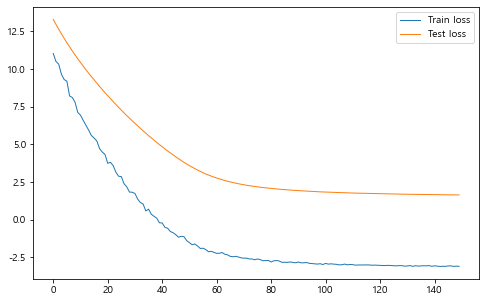

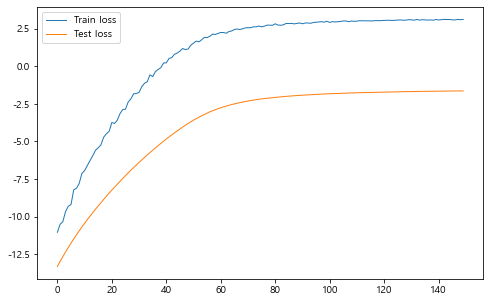

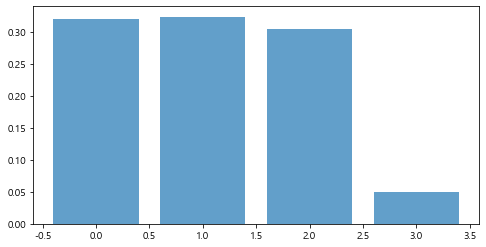

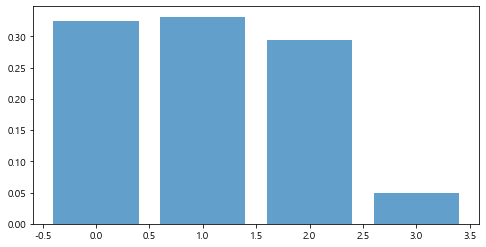

In [ ]:
xc_train = xc_train.astype('float32') * 20.0
xf_train = xf_train.astype('float32') * 20.0
xc_test = xc_test.astype('float32') * 20.0
xf_test = xf_test.astype('float32') * 20.0

N_TIME = xc_train.shape[1]
N_FUTURE = xf_train.shape[1]
N_STOCKS = xf_train.shape[2]

# 학습 데이터는 shuffling 한다.
xc_train, xf_train = shuffle(xc_train, xf_train)

# Markowitz Network를 생성한다.
# over confidence를 제어할 조절 변수 정의
GAMMA_CONST = 0.1
REG_CONST = 0.1
SAVE_MODEL = 'data/3-1.MPN_LSTM.h5'

# 최적 포트폴리오를 구축할 목표 함수를 정의한다.
# Markowitz Network에서는 이 함수를 loss로 이용한다. max(objective) = min(-objective)
# y_pred = 마코비츠 네트워크의 출력이 전달된다. (keras 내부 기능)
# y_true = model.fit()에서 전달된 N_FUTURE일 후의 수익률 (xf_train)이 들어온다.
def markowitz_objective(y_true, y_pred):
    W = y_pred      # 마코비츠 네트워크의 출력
    xf_rtn = y_true
    W = tf.expand_dims(W, axis = 1)   # W = (None, 1, 50)
    R = tf.expand_dims(tf.reduce_mean(xf_rtn, axis = 1), axis = 2) # R = (None, 50, 1)
    C = tfp.stats.covariance(xf_rtn, sample_axis=1)

    rtn = tf.matmul(W, R)  
    vol = tf.matmul(W, tf.matmul(C, tf.transpose(W, perm = [0, 2, 1]))) * GAMMA_CONST
    reg = tf.reduce_sum(tf.square(W), axis = -1) * REG_CONST
    objective = rtn - vol - reg
    
    return -tf.reduce_sum(objective, axis=0)

# LSTM으로 Markowitz 모델을 생성한다.
xc_input = Input(batch_shape = (None, N_TIME, N_STOCKS))
h_lstm = LSTM(50, dropout = 0.5)(xc_input)
y_output = Dense(N_STOCKS, activation='tanh')(h_lstm)  # linear projection

# 특정 종목을 과도하게 매수하는 것을 방지하기 위해 위에서 tanh를 사용했다. 
# (over confidence 방지용). REG_CONST를 적용했기 때문에 이미 고려된 사항이지만, 
# 안전을 위해 추가했다. ex : [-3, 0.4, 0.2, +20] --> [-0.995, 0.380, 0.197, 1.0]

# 마코비츠의 최적 weights
y_output = Activation('softmax')(y_output)

model = Model(xc_input, y_output)
model.compile(loss = markowitz_objective, 
              optimizer = Adam(learning_rate = 1e-5))
model.summary()

# MPN을 학습하고 결과를 저장한다.
hist = model.fit(xc_train, xf_train, epochs=150, batch_size = 100, 
                 validation_data = (xc_test, xf_test))
model.save(SAVE_MODEL)

# loss trajectory를 확인한다.
plt.figure(figsize=(8, 5))
plt.plot(hist.history['loss'], label='Train loss')
plt.plot(hist.history['val_loss'], label='Test loss')
plt.legend()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(np.negative(hist.history['loss']), label='Train loss')
plt.plot(np.negative(hist.history['val_loss']), label='Test loss')
plt.legend()
plt.show()

# 최적 포트폴리오 결과 확인용 코드
def check_w(n = 0):
    plt.figure(figsize=(8, 4))
    y_pred = model.predict(xc_test[n].reshape(1, N_TIME, N_STOCKS))[0]
    plt.bar(np.arange(N_STOCKS), y_pred, alpha = 0.7)
    plt.show()
    
check_w(0)
check_w(200)

In [ ]:
# MPN을 이용해서 백 테스트를 수행한다.
# --------------------------------
lstm_value = [10000]   # portfolio의 초기 value   # portfolio의 초기 value
crp_value = [10000]   # CRP의 초기 value
w_crp = np.ones(N_STOCKS) / N_STOCKS   # CRP 비율 (균등 비율)

w_hist_lstm = []
for i in range(0, xc_test.shape[0], N_FUTURE):
    # LSTM으로 W를 추정한다.
    x = xc_test[i][np.newaxis,:, :] * 20.0
    w_lstm = model.predict(x)[0]
    w_hist_lstm.append(w_lstm)
    
       
    # 다음 기의 누적 수익률
    m_rtn = np.sum(xf_test[i], axis = 0)
    
    # 누적 수익률과 w_prt (W)로 포트폴리오의 수익률을 계산한다.
    lstm_value.append(lstm_value[-1] * np.exp(np.dot(w_lstm, m_rtn)))
    crp_value.append(crp_value[-1] * np.exp(np.dot(w_crp, m_rtn)))

print('\nBack test를 완료했습니다.')


Back test를 완료했습니다.


In [ ]:
# 평가 시점의 날짜를 발췌한다.
idx = np.arange(0, len(test_date), N_FUTURE)

# Markowitz 성과와 CRP 성과를 데이터 프레임에 기록해 둔다.
perf_df = pd.DataFrame({'crp':crp_value, 
                        'lstm_markowitz':lstm_value,}, 
                       index=test_date[idx])

In [ ]:
# S&P500 index와 포트폴리오 성과를 비교해 본다.
sp500 = pd.DataFrame(kospi['종가'])


In [ ]:
kospi=kospi.set_index('날짜')

In [ ]:
sp500

,종가
날짜,
2002-01-02,724.95
2002-01-03,727.66
2002-01-04,747.72
2002-01-07,751.48
2002-01-08,734.76
...,...
2022-04-29,2695.05
2022-05-02,2687.45
2022-05-03,2680.46


In [ ]:
# 수익률을 계산해서 perf_df와 시작 위치를 맞춘다 (초기 value를 맞춘다).
sp500 = sp500[test_date[0]:]
sp_trans = lstm_value[0] / sp500['종가'][0]
perf_df['sp500'] = sp500['종가'] * sp_trans

In [ ]:
perf_df=perf_df.drop('crp',axis=1)

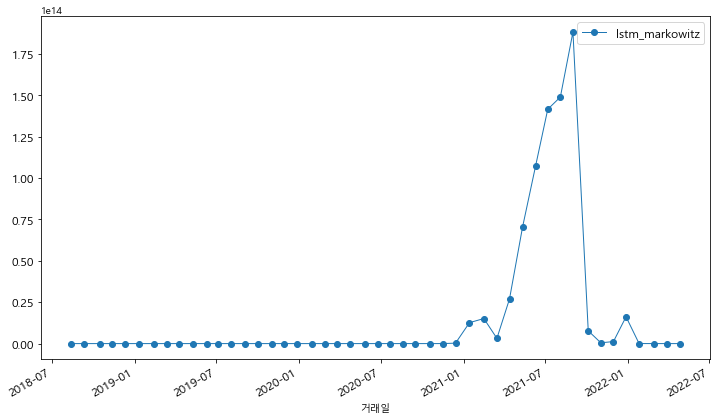

In [ ]:
# S&P500 index (시장), CRP, 그리고 MPN의 성과를 비교한다.
p = perf_df.plot(figsize=(12, 7), style = '-o', fontsize=12)
p.legend(fontsize=12)
plt.show()

In [ ]:




# weights history를 확인한다.
w_hist_lstm = np.array(w_hist_lstm)
w_hist_conv = np.array(w_hist_conv)

# 종목 이름을 읽어온다.
symbol = df.columns

n = 10
plt.figure(figsize=(12, 4))
for i in range(n):
    plt.plot(w_hist_lstm[:, i], label=symbol[i])
plt.legend()
plt.title('W history by LSTM')
plt.xticks(np.arange(0, 47), list(perf_df.index[1:]), rotation='vertical')
plt.show()


# 포트폴리오 수익률, 위험, SR을 측정한다.
rp_df = perf_df.copy()
rp_df['crp_rtn'] = np.log(rp_df['crp']) - np.log(rp_df['crp'].shift(1))
rp_df['lstm_rtn'] = np.log(rp_df['lstm_markowitz']) - np.log(rp_df['lstm_markowitz'].shift(1))
rp_df['sp500_rtn'] = np.log(rp_df['sp500']) - np.log(rp_df['sp500'].shift(1))
rp_df = rp_df.dropna()

# 포트폴리오 수익률 (연간)
rp = rp_df[['crp_rtn', 'lstm_rtn', 'conv_rtn', 'sp500_rtn']].mean()
rp *= 12  # 20일 = 약 1개월, 1년 = 12개월
print('\n포트폴리오 수익률 (연간):')
print(rp)

# 포트폴리오 위험 (연간 표준편차)
sp = rp_df[['crp_rtn', 'lstm_rtn', 'conv_rtn', 'sp500_rtn']].std()
sp *= np.sqrt(12)
print('\n포트폴리오 위험 (연간):')
print(sp)

# Sharp ratio
print('\nSharp Ratio :')
print(rp / sp)

# 최적 포트폴리오 결과 확인용 코드 (참고용)
def check_w(n = 0):
    plt.figure(figsize=(14,5))
    x = xc_test[n][np.newaxis,:,:] * 20.0
    w_lstm = lstm_model.predict(x)[0]
    plt.bar(np.arange(N_STOCKS), w_lstm, alpha = 0.7)
    plt.xticks(np.arange(50), list(symbol), rotation='vertical')
    plt.title('W by LSTM')
    plt.show()

check_w(0)

,단기채,중기채,장기채,kospi_pct
거래일,,,,
2002-01-03,0.000153,0.000165,0.000195,0.003738
2002-01-04,0.000326,0.000909,0.002310,0.027568
2002-01-07,0.000415,0.000919,0.002359,0.005029
2002-01-08,0.000085,-0.000170,-0.000593,-0.022249
2002-01-09,0.000124,0.000499,0.000542,0.022933
...,...,...,...,...
2022-04-28,0.000076,-0.000707,-0.000710,0.010773
2022-04-29,0.000057,-0.000591,-0.001723,0.010332
2022-05-02,0.000143,-0.001413,-0.005704,-0.002820


In [ ]:
df.to_csv('채권과코스피수익률.csv')

In [ ]:
df2.corr()

,단기채,중기채,장기채,kospi_pct,단기채누적,중기채누적,장기채누적,kospi누적
단기채,1.000000,0.594389,0.393480,-0.155839,-0.185354,-0.186519,-0.182392,-0.131726
중기채,0.594389,1.000000,0.900426,-0.198688,-0.038584,-0.034186,-0.028177,-0.074038
장기채,0.393480,0.900426,1.000000,-0.143973,0.010030,0.016312,0.026343,-0.029744
kospi_pct,-0.155839,-0.198688,-0.143973,1.000000,-0.028515,-0.028969,-0.030307,0.099232
단기채누적,-0.185354,-0.038584,0.010030,-0.028515,1.000000,0.996954,0.956319,0.492978
중기채누적,-0.186519,-0.034186,0.016312,-0.028969,0.996954,1.000000,0.975457,0.486405
장기채누적,-0.182392,-0.028177,0.026343,-0.030307,0.956319,0.975457,1.000000,0.455115
kospi누적,-0.131726,-0.074038,-0.029744,0.099232,0.492978,0.486405,0.455115,1.000000


In [ ]:
df2['단기채누적']=df2['단기채'].cumsum()
df2['중기채누적']=df2['중기채'].cumsum()
df2['장기채누적']=df2['장기채'].cumsum()
df2['kospi누적']=df2['kospi_pct'].cumsum()

C:\Users\ASIA\AppData\Local\Temp\ipykernel_34964\2470517282.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['단기채누적']=df2['단기채'].cumsum()
C:\Users\ASIA\AppData\Local\Temp\ipykernel_34964\2470517282.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['중기채누적']=df2['중기채'].cumsum()
C:\Users\ASIA\AppData\Local\Temp\ipykernel_34964\2470517282.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

In [ ]:
df2=df.loc['2012-01-01':'2015-01-01']

<AxesSubplot:xlabel='거래일'>

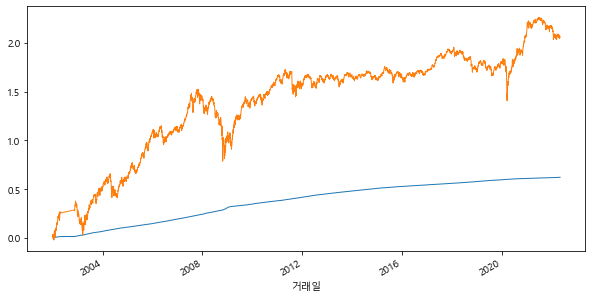

In [ ]:
df['단기채누적'].plot()
df['kospi누적'].plot()